# Trabajo Final - Caso Spotify

## Carga del dataset

In [3]:
# Dataset: https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv

data = read_csv('spotify_songs.csv', delimiter=',')
print(data.head(5))

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

## Información general del dataset

In [4]:
# Información básica sobre el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
# Descripción de las variables numéricas
display(data.describe())

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [6]:
# Descripción de las variables categóricas
display(data.describe(include='object'))

,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre
count,32833,32828,32828,32833,32828,32833,32833,32833,32833,32833
unique,28356,23449,10692,22545,19743,4530,449,471,6,24
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,progressive electro house
freq,10,22,161,42,139,270,308,247,6043,1809


## Valores únicos y faltantes por columna

In [7]:
# Verifica si hay valores nulos por columna
print("\nValores nulos por columna:")
display(data.isnull().sum())


Valores nulos por columna:


track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

## Conteo de Filas duplicadas

In [8]:
# Detectar y contar las filas duplicadas
duplicate_rows = data.duplicated().sum()

print(f"Número de filas duplicadas: {duplicate_rows}")

# Visualización de filas duplicadas
if duplicate_rows > 0:
    print("\nEjemplo de filas duplicadas:")
    display(data[data.duplicated(keep=False)].head())

Número de filas duplicadas: 0


## Detección y conteo de outliers por columna

In [9]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns

# Calculate IQR and identify outliers for each numerical column
outliers = {}
outlier_summary = {}

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if not col_outliers.empty:
        outliers[col] = col_outliers[col]
        outlier_summary[col] = {
            'count': len(col_outliers),
            'percentage': (len(col_outliers) / len(data)) * 100
        }

# Display the outliers
if outliers:
    print("\nOutliers detectados:")
    for col, values in outliers.items():
        print(f"\nColumna '{col}':")
        display(values)
    print("\nResumen:")
    for col, summary in outlier_summary.items():
        print(f"'{col}': Count = {summary['count']}, Percentage = {summary['percentage']:.2f}%")


Outliers detectados:

Columna 'danceability':


886      0.206
900      0.225
1258     0.258
1446     0.258
1517     0.225
         ...  
30653    0.262
31093    0.264
31328    0.245
32374    0.264
32725    0.162
Name: danceability, Length: 291, dtype: float64


Columna 'energy':


1090     0.1720
1116     0.1820
1121     0.1120
1272     0.1470
1361     0.1860
          ...  
26757    0.1500
26788    0.0474
26789    0.1710
27549    0.1060
29226    0.1850
Name: energy, Length: 277, dtype: float64


Columna 'loudness':


689     -14.454
839     -14.916
845     -13.968
1081    -14.520
1090    -20.700
          ...  
31688   -14.377
31690   -14.065
31703   -16.416
32641   -13.606
32647   -14.525
Name: loudness, Length: 1021, dtype: float64


Columna 'speechiness':


43       0.295
82       0.486
121      0.350
190      0.270
208      0.321
         ...  
32675    0.302
32680    0.285
32737    0.318
32751    0.292
32816    0.283
Name: speechiness, Length: 3176, dtype: float64


Columna 'acousticness':


387      0.617
403      0.693
475      0.656
577      0.798
689      0.902
         ...  
31629    0.788
31982    0.713
32013    0.681
32044    0.837
32556    0.619
Name: acousticness, Length: 2205, dtype: float64


Columna 'instrumentalness':


20       0.0198
21       0.0810
43       0.3300
44       0.0271
45       0.7460
          ...  
32817    0.5060
32819    0.9320
32823    0.2190
32831    0.1270
32832    0.3410
Name: instrumentalness, Length: 7030, dtype: float64


Columna 'liveness':


8        0.637
97       0.577
129      0.544
177      0.499
181      0.704
         ...  
32731    0.699
32795    0.547
32810    0.534
32827    0.572
32832    0.742
Name: liveness, Length: 1843, dtype: float64


Columna 'tempo':


396      187.981
413      200.012
436      190.050
542      201.948
669      200.000
          ...   
32377    192.118
32402    194.997
32546    194.956
32583    194.050
32725    195.041
Name: tempo, Length: 571, dtype: float64


Columna 'duration_ms':


502      360960
589      353893
837      458058
900      452389
1004     450000
          ...  
32807    379261
32814    393750
32819    377930
32829    353120
32831    367432
Name: duration_ms, Length: 1387, dtype: int64


Resumen:
'danceability': Count = 291, Percentage = 0.89%
'energy': Count = 277, Percentage = 0.84%
'loudness': Count = 1021, Percentage = 3.11%
'speechiness': Count = 3176, Percentage = 9.67%
'acousticness': Count = 2205, Percentage = 6.72%
'instrumentalness': Count = 7030, Percentage = 21.41%
'liveness': Count = 1843, Percentage = 5.61%
'tempo': Count = 571, Percentage = 1.74%
'duration_ms': Count = 1387, Percentage = 4.22%


## Visualizaciones de Datos

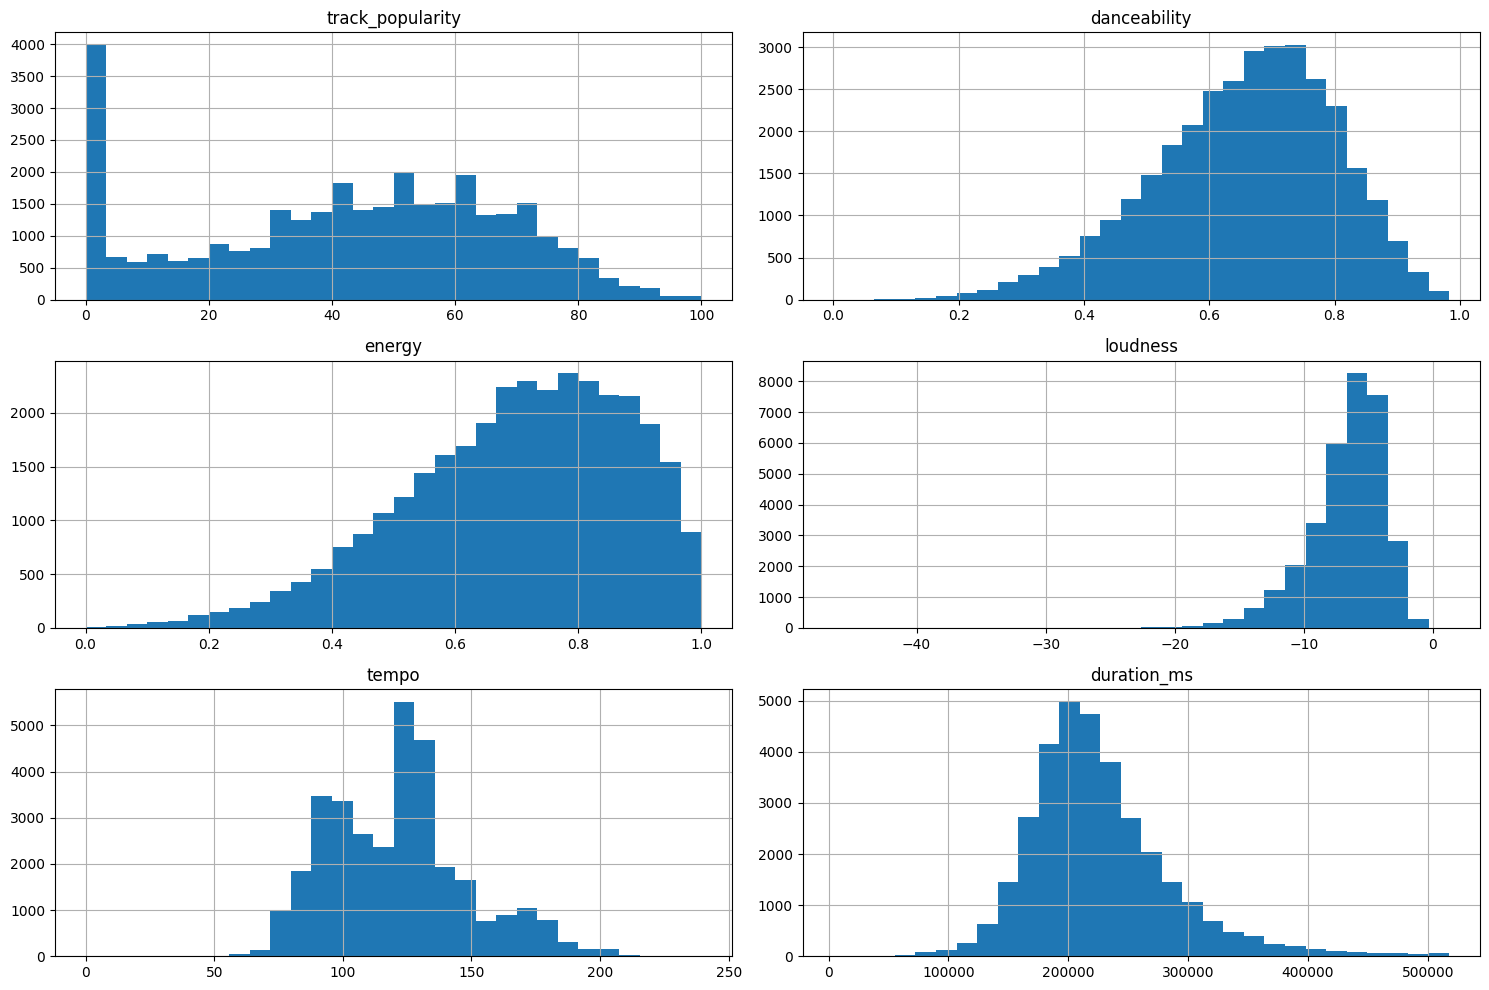

In [10]:
# Select numerical columns for histograms
numerical_cols_for_hist = ['track_popularity', 'danceability', 'energy', 'loudness', 'tempo', 'duration_ms']

# Create histograms
data[numerical_cols_for_hist].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


Matriz de correlación de variables numéricas:


,track_popularity,danceability,energy,loudness,tempo,duration_ms
track_popularity,1.000000,0.064748,-0.109112,0.057687,-0.005378,-0.143682
danceability,0.064748,1.000000,-0.086073,0.025335,-0.184084,-0.096879
energy,-0.109112,-0.086073,1.000000,0.676625,0.149951,0.012611
loudness,0.057687,0.025335,0.676625,1.000000,0.093767,-0.115058
tempo,-0.005378,-0.184084,0.149951,0.093767,1.000000,-0.001412
duration_ms,-0.143682,-0.096879,0.012611,-0.115058,-0.001412,1.000000


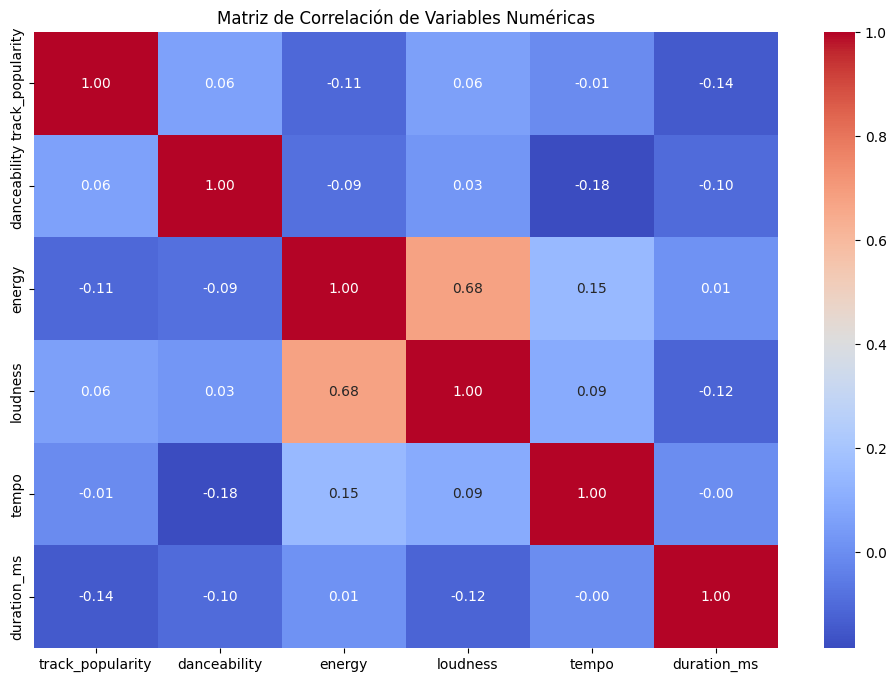

In [11]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = data[numerical_cols_for_hist].corr()

# Display the correlation matrix
print("\nMatriz de correlación de variables numéricas:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


Popularidad promedio de las canciones por género de lista de reproducción:


playlist_genre
pop      47.744870
latin    47.026576
rap      43.215454
rock     41.728338
r&b      41.223532
edm      34.833526
Name: track_popularity, dtype: float64

C:\Users\Jorge\AppData\Local\Temp\ipykernel_6496\2603011945.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_by_genre.index, y=popularity_by_genre.values, palette='viridis')


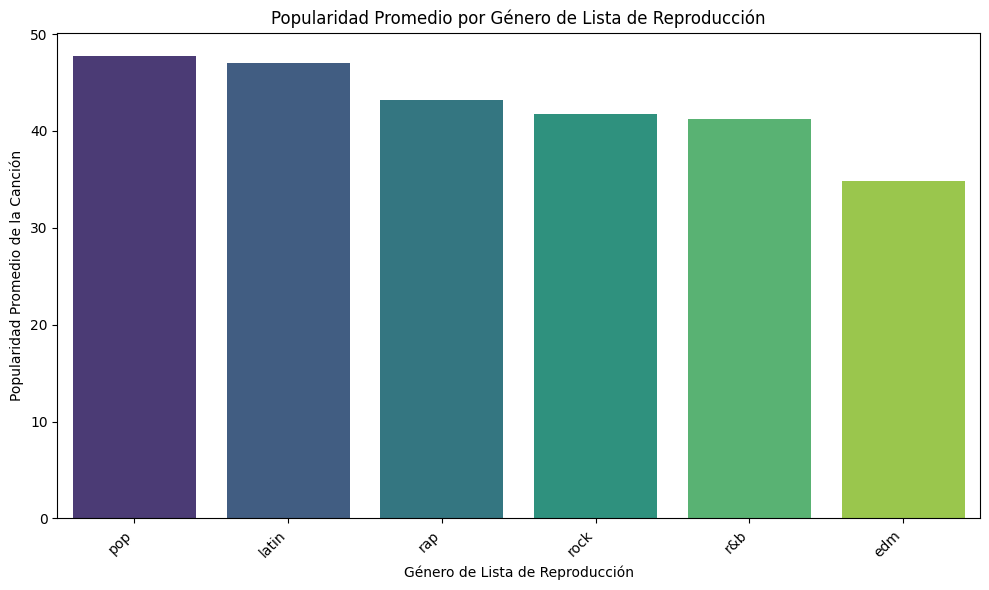

In [12]:
# Explore the relationship between 'playlist_genre' and 'track_popularity'
popularity_by_genre = data.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

print("\nPopularidad promedio de las canciones por género de lista de reproducción:")
display(popularity_by_genre)

# You could also visualize this using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_by_genre.index, y=popularity_by_genre.values, palette='viridis')
plt.title('Popularidad Promedio por Género de Lista de Reproducción')
plt.xlabel('Género de Lista de Reproducción')
plt.ylabel('Popularidad Promedio de la Canción')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()